# Logistic regression

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

## Data

In [2]:
df = pd.read_csv('Datasets/classification/breast-cancer-wisconsin.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df = df.iloc[:, 1:]
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploratory Data Analysis

### 1. Looking for null values

In [4]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [5]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### 2. Data Preprocessing

In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
# Replace M with 1 and Begnin with 0 (else 0)
print("Malignant=1, Benign=0")
df["diagnosis"]= df["diagnosis"].map(lambda row: 1 if row=='M' else 0)
df.head()

Malignant=1, Benign=0


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [9]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 3. Unique Values

In [10]:
print("The unique number of data values are")
df.nunique()

The unique number of data values are


diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

### 4. Data Spread between the two types (Malignant, Benign)

In [11]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

0    357
1    212
Name: diagnosis, dtype: int64
0.37258347978910367
Total number of data points = 569
Malignant (diagnosis = 1) = 37.26%
Benign (diagnosis = 0) = 62.74%


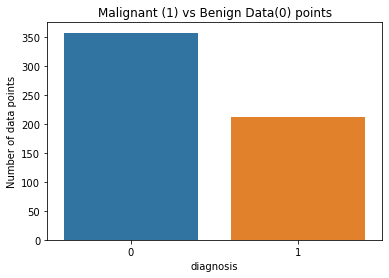

In [12]:
import seaborn as sns

diagnosis_counts = df["diagnosis"].value_counts()
mean_diagnosis = df["diagnosis"].mean()
total_data_points = len(df)

print(diagnosis_counts)
print(mean_diagnosis)

print("Total number of data points =", total_data_points)
print("Malignant (diagnosis = 1) = {:.2f}%".format(mean_diagnosis * 100))
print("Benign (diagnosis = 0) = {:.2f}%".format((1 - mean_diagnosis) * 100))

sns.countplot(data=df, x="diagnosis")
plt.ylabel("Number of data points")
plt.title("Malignant (1) vs Benign Data(0) points")
plt.show()

### 5. Feature selection (Correlation Matrix)

In [13]:
corr = df.corr()
corr[['diagnosis']].abs().sort_values(by='diagnosis', ascending=False)

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


#### Feature Selection and Correlation Matrix Visualization for Breast Cancer Diagnosis

Selected Features:
Index(['concave points_mean', 'perimeter_worst', 'concave points_worst'], dtype='object')


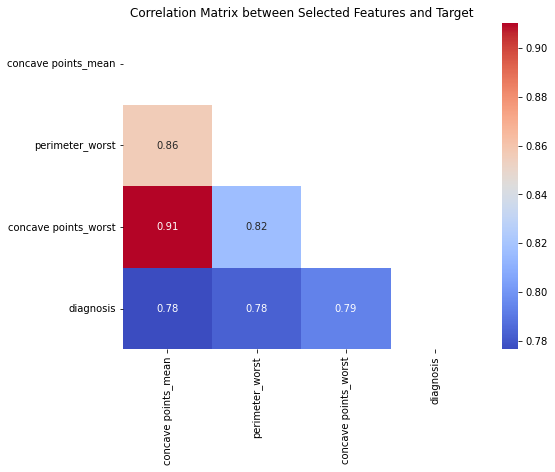

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression, r_regression
import numpy as np

# Separate the features (X) and the target variable (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Perform feature selection
selector = SelectKBest(score_func=f_regression, k=3)
selected_features = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)

# Create a DataFrame with the selected features
selected_df = X[selected_feature_names]

# Calculate the correlation matrix between selected features and target
correlation_matrix = selected_df.join(y).corr()
new_df = selected_df.join(y)

# Create a triangular mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix between Selected Features and Target')
plt.show()

In [15]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
print(mask)

[[ True  True  True  True]
 [False  True  True  True]
 [False False  True  True]
 [False False False  True]]


In [16]:
new_df.head()

,concave points_mean,perimeter_worst,concave points_worst,diagnosis
0,0.14710,184.60,0.2654,1
1,0.07017,158.80,0.1860,1
2,0.12790,152.50,0.2430,1
3,0.10520,98.87,0.2575,1
4,0.10430,152.20,0.1625,1


### 6. Dimension Reduction

Text(0.5, 1.0, 'PCA projection of Breast Cancer Dataset')

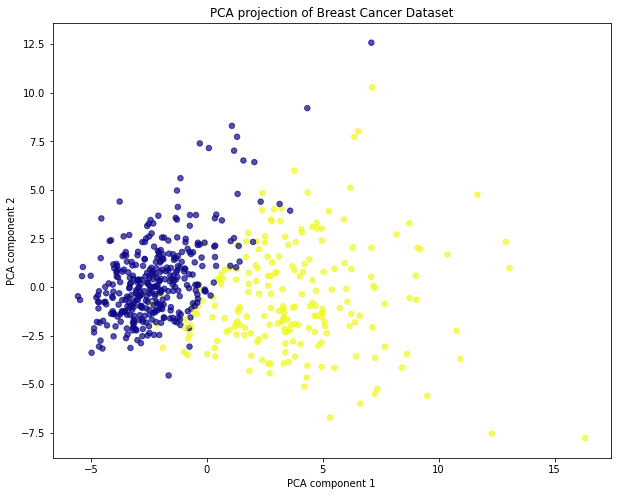

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df['diagnosis'], alpha=0.7, s=30, cmap='plasma')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('PCA projection of Breast Cancer Dataset')

## Train_test_split

In [18]:
new_df = new_df.drop(columns=['concave points_mean'], axis=1)
new_df.head()

,perimeter_worst,concave points_worst,diagnosis
0,184.60,0.2654,1
1,158.80,0.1860,1
2,152.50,0.2430,1
3,98.87,0.2575,1
4,152.20,0.1625,1


In [19]:
# X = new_df.drop('diagnosis', axis=1)
# y = new_df['diagnosis']

In [20]:
train_df, test_df = train_test_split(new_df, test_size=0.2, random_state=42)
new_df.shape, train_df.shape, test_df.shape

((569, 3), (455, 3), (114, 3))

## Data Normalization

### 1. Normalization
Normalization scales the values of a dataset to a specific range, typically between **0 and 1**, to ensure consistency and improve the performance.

#### Method 1

In [21]:
def normalization(data, train_data):
    min_value = np.min(train_data, axis=0)
    max_value = np.max(train_data, axis=0)
    normalized_data = (data - min_value) / (max_value - min_value)
    return normalized_data

In [22]:
# Assuming train_data and test_data are the respective train and test sets
normalized_train = normalization(train_df, train_df)
normalized_test  = normalization(test_df, train_df)

In [23]:
normalized_train.head()

,perimeter_worst,concave points_worst,diagnosis
68,0.055971,0.601375,0.0
181,0.620253,0.997595,1.0
63,0.056428,0.174811,0.0
248,0.119414,0.210859,0.0
60,0.078135,0.088625,0.0


In [24]:
train_df.head()

,perimeter_worst,concave points_worst,diagnosis
68,65.50,0.17500,0
181,176.50,0.29030,1
63,65.59,0.05087,0
248,77.98,0.06136,0
60,69.86,0.02579,0


In [25]:
print("Minimum values:")
print(train_df.min())
print()

print("Maximum values:")
print(train_df.max())
print()

print("Standard deviation:")
print(train_df.std())

Minimum values:
perimeter_worst         54.49
concave points_worst     0.00
diagnosis                0.00
dtype: float64

Maximum values:
perimeter_worst         251.200
concave points_worst      0.291
diagnosis                 1.000
dtype: float64

Standard deviation:
perimeter_worst         33.374664
concave points_worst     0.065326
diagnosis                0.483719
dtype: float64


In [26]:
print("Minimum values:")
print(normalized_train.min())
print()

print("Maximum values:")
print(normalized_train.max())
print()

print("Standard deviation:")
print(normalized_train.std())

Minimum values:
perimeter_worst         0.0
concave points_worst    0.0
diagnosis               0.0
dtype: float64

Maximum values:
perimeter_worst         1.0
concave points_worst    1.0
diagnosis               1.0
dtype: float64

Standard deviation:
perimeter_worst         0.169664
concave points_worst    0.224488
diagnosis               0.483719
dtype: float64


#### Method 2

The output type of the `fit_transform` method of `MinMaxScaler` is a numpy array. When you apply `fit_transform` to your data, it returns a transformed version of the input data, where each feature (column) has been scaled to the specified range.

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the train DataFrame
scaler.fit(train_df)

# Normalize the train DataFrame
normalized_train = scaler.transform(train_df)

# Normalize the test DataFrame using the fitted scaler
normalized_test = scaler.transform(test_df)

In [28]:
normalized_train.min(), normalized_train.max(), normalized_test.min(), normalized_test.max()

(0.0, 1.0, -0.0207411926185756, 1.0)

### 2. Standardization

#### Method 1

In [29]:
def standardization(data, train_data):
    mean_value = np.mean(train_data, axis=0)
    std_value  = np.std(train_data, axis=0)
    standardized_data = (data - mean_value) / std_value
    return standardized_data

In [30]:
standardized_train = standardization(train_df, train_df)
standardized_test  = standardization(test_df, train_df)

standardized_train.head()

,perimeter_worst,concave points_worst,diagnosis
68,-1.247920,0.932012,-0.768706
181,2.081617,2.698947,1.300887
63,-1.245220,-0.970239,-0.768706
248,-0.873572,-0.809483,-0.768706
60,-1.117138,-1.354582,-0.768706


In [31]:
standardized_train.min(), standardized_train.max()

(perimeter_worst        -1.578174
 concave points_worst   -1.749805
 diagnosis              -0.768706
 dtype: float64,
 perimeter_worst         4.322305
 concave points_worst    2.709674
 diagnosis               1.300887
 dtype: float64)

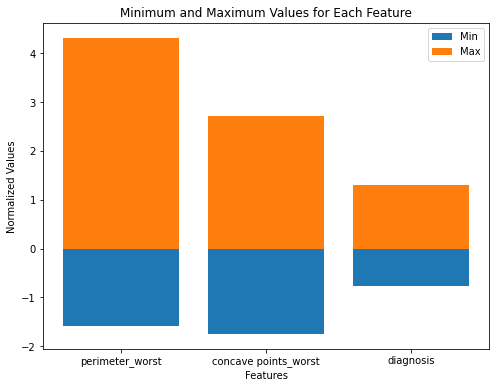

In [32]:
import matplotlib.pyplot as plt

# Calculate the minimum and maximum values for each feature
min_values = standardized_train.min()
max_values = standardized_train.max()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(min_values.index, min_values, label='Min')
plt.bar(max_values.index, max_values, label='Max')
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.title('Minimum and Maximum Values for Each Feature')
plt.legend()
plt.show()

#### Method 2

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
standardized_train = scaler.fit_transform(train_df)
standardized_test =  scaler.transform(test_df)

## Model with GridSearchCV

In [35]:
normalized_train = normalization(train_df, train_df)
normalized_test  = normalization(test_df, train_df)

In [36]:
# Extract features and target variable columns from normalized_train, and normalized_test
x_train = normalized_train.drop(columns=['diagnosis']).values
y_train = normalized_train['diagnosis'].values

x_test = normalized_test.drop(columns=['diagnosis']).values
y_test = normalized_test['diagnosis'].values

In [37]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(455, 2) (455,) (114, 2) (114,)


In [38]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 2, 5],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}

logistic_regression = LogisticRegression()
model = GridSearchCV(logistic_regression, param_grid)
model.fit(x_train, y_train)
best_clf = model.best_estimator_
best_clf

LogisticRegression(C=1)

## Evaluation

In [41]:
from sklearn.metrics import classification_report

y_pred = best_clf.predict(x_test)
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        71
         1.0       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## Plot the decision boundary

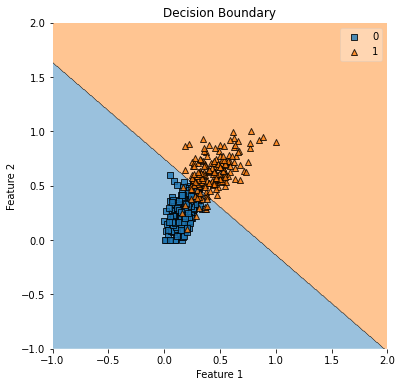

In [42]:
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(figsize=(6, 6))

plot_decision_regions(x_train, y_train.astype(np.int_), clf=best_clf)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Decision Boundary")
plt.show()